In [1]:
push!(LOAD_PATH, "/Users/aaron/projects/Ising/src")

using PyPlot, Statistics, CPUTime
using SpinBodies, MBTrees;

┌ Info: Precompiling MBTrees [top-level]
└ @ Base loading.jl:1260


In [2]:
const maxsteps = 1000000
const n        = 20
const T_step   = 0.1
const Ts       = T_step:T_step:4;

In [3]:
freeman_data        = Vector{Float64}(undef, length(Ts))
freeman_fast_data   = Vector{Float64}(undef, length(Ts))
freeman_faster_data = Vector{Float64}(undef, length(Ts))
metropolis_data     = Vector{Float64}(undef, length(Ts));

# Freeman Data

In [4]:
# for (i, T) in enumerate(Ts)
#     lattice = SpinLattice(n, T)
#     tree = build_tree(lattice)
#     times = Vector{Float64}(undef, 20)
#     for j = 1:10
#         time = @CPUelapsed while lattice.steps < maxsteps
#             freeman_step!(lattice, tree)
#         end
#         times[j] = time
#     end
#     freeman_data[i] = mean(times)
#     if i % 5 == 0
#         println("T = $T")
#     end
# end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


# Freeman (Fast) Data

In [14]:
for (i, T) in enumerate(Ts)
    lattice = SpinLattice(n, T)
    tree = build_tree(lattice)
    times = Vector{Float64}(undef, 20)
    for j = 1:10
        time = @CPUelapsed while lattice.steps < maxsteps
            freeman_step!(lattice, tree, fast=true)
        end
        times[j] = time
    end
    freeman_fast_data[i] = mean(times)
    if i % 5 == 0
        println("T = $T")
    end 
end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


# Freeman (Faster?) Data

In [6]:
for (i, T) in enumerate(Ts)
    lattice = SpinLattice(n, T)
    tree = TreeVec(lattice)
    times = Vector{Float64}(undef, 20)
    for j = 1:10
        time = @CPUelapsed while lattice.steps < maxsteps
            treevecstep!(lattice, tree)
        end
        times[j] = time
    end
    freeman_faster_data[i] = mean(times)
    if i % 5 == 0
        println("T = $T")
    end 
end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


# Metropolis Data

In [7]:
# for (i, T) in enumerate(Ts)
#     lattice = SpinLattice(n, T)
#     times = Vector{Float64}(undef, 20)
#     for j = 1:10
#         time = @CPUelapsed while lattice.steps < maxsteps
#             metropolis_step!(lattice)
#         end
#         times[j] = time
#     end
#     metropolis_data[i] = mean(times)
#     if i % 5 == 0
#         println("T = $T")
#     end 
# end

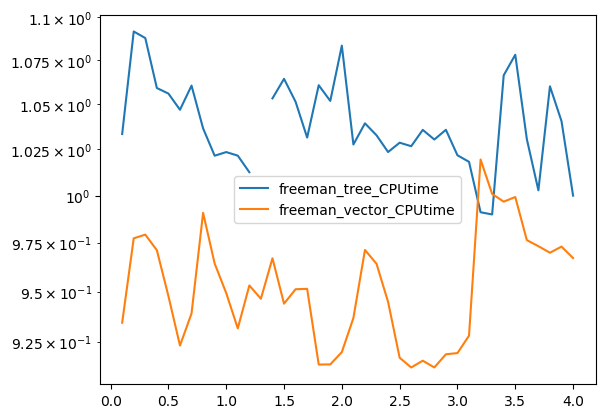

PyObject <matplotlib.legend.Legend object at 0x7fb431dc3f10>

In [15]:
semilogy(Ts, freeman_fast_data ./ freeman_fast_data[end]) # / freeman_data[end] * metropolis_data[end])
# semilogy(Ts, freeman_fast_data ./ freeman_fast_data[end]) # / freeman_fast_data[end] * metropolis_data[end])
semilogy(Ts, freeman_faster_data ./ freeman_fast_data[end]) # / freeman_faster_data[end] * metropolis_data[end])
legend(["freeman_tree_CPUtime",  "freeman_vector_CPUtime"])
savefig("comparison_tree_vs_vector.pdf")